# 1.IMPORTING LIBRARIES

In [2]:
# Importing the libraries
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from sklearn import metrics
from keras.preprocessing import image
import matplotlib.pyplot as plt

# 2.IMAGE PROCESSING

dataset link : https://www.kaggle.com/code/nurulaminapon/endoscopy-image-processing/data

data size 1.52 GB

In [3]:
train_set = 'data/train'
val_set = 'data/val'
test_set = 'data/test'

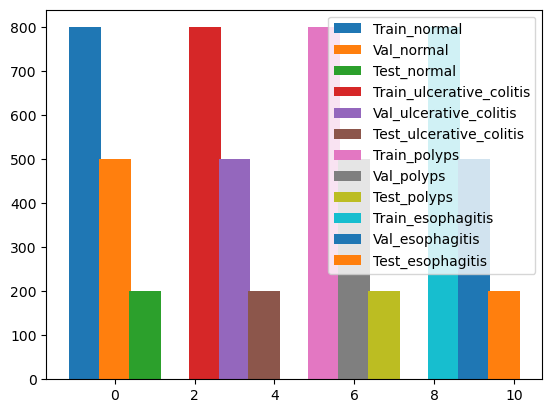

In [40]:
import os
lst = os.listdir(train_set)
for i in lst:
    plt.bar(3*lst.index(i)-0.75, len(os.listdir(train_set + '/' + i)), label = 'Train'+str(i)[1:])
    plt.bar(3*lst.index(i), len(os.listdir(val_set + '/' + i)), label = 'Val'+str(i)[1:])
    plt.bar(3*lst.index(i)+0.75, len(os.listdir(test_set + '/' + i)), label = 'Test'+str(i)[1:])
plt.legend()
plt.show()

so, we have balanced data set where training data set has 3200 images and test data set has 800 images and validation data has 2000 images. we have 4 classes in our data set. and each class has 800 images.

In [4]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)
validation_datagen = ImageDataGenerator(
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1)
test_datagen = ImageDataGenerator(
    rotation_range=15,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1)


In [5]:
# image addressing
train_generator = train_datagen.flow_from_directory(
    train_set,
    target_size=(224, 224),  # chosen image size by model
    batch_size=16,
    class_mode='categorical')
validation_generator = validation_datagen.flow_from_directory(
    val_set,
    target_size=(224, 224),
    batch_size=16,
    shuffle=True,
    class_mode='categorical')
test_generator = test_datagen.flow_from_directory(
    test_set,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    shuffle=False)


Found 3200 images belonging to 4 classes.
Found 2000 images belonging to 4 classes.
Found 800 images belonging to 4 classes.


# 3.MODEL CREATION

Here, we are using the EfficientNet-B2 model for this classification problem. we are using the pretrained model and we are training it partially. we are using the imagenet weights for this model.

input_shape=(224,224,3) =>this is the input dimensions of the model. So, that means we are using RGB imgaes

here, training it partially so as to reduce the traning time on the stake of accuracy.

In [5]:
base_model = tf.keras.applications.EfficientNetB2(weights='imagenet', input_shape=(224,224,3), include_top=False)

# Freeze the base model
for layer in base_model.layers:
    layer.trainable=False

# Create new model on top
model = Sequential()
model.add(base_model)
model.add(GaussianNoise(0.35))
model.add(GlobalAveragePooling2D())
model.add(Dense(256,activation='relu'))
model.add(BatchNormalization())
model.add(GaussianNoise(0.35))
model.add(Dropout(0.2))
model.add(Dense(4, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb2 (Functional)  (None, 7, 7, 1408)       7768569   
                                                                 
 gaussian_noise (GaussianNoi  (None, 7, 7, 1408)       0         
 se)                                                             
                                                                 
 global_average_pooling2d (G  (None, 1408)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 256)               360704    
                                                                 
 batch_normalization (BatchN  (None, 256)              1024      
 ormalization)                                                   
                                                        

# 4.MODEL COMPILATION & TRAINING

In [6]:
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy','Precision','Recall','AUC'])

In [7]:
history = model.fit(train_generator, steps_per_epoch=20, epochs=20, validation_data=validation_generator)

Epoch 1/20
20/20 [==============================] - 62s 2s/step - loss: 0.6275 - accuracy: 0.7563 - precision: 0.8007 - recall: 0.7406 - auc: 0.9424 - val_loss: 0.5601 - val_accuracy: 0.7815 - val_precision: 0.8318 - val_recall: 0.6975 - val_auc: 0.9478
Epoch 2/20
20/20 [==============================] - 46s 2s/step - loss: 0.2915 - accuracy: 0.8938 - precision: 0.9016 - recall: 0.8875 - auc: 0.9845 - val_loss: 0.3511 - val_accuracy: 0.8820 - val_precision: 0.9186 - val_recall: 0.8350 - val_auc: 0.9834
Epoch 3/20
20/20 [==============================] - 43s 2s/step - loss: 0.2863 - accuracy: 0.9031 - precision: 0.9054 - recall: 0.8969 - auc: 0.9855 - val_loss: 0.2971 - val_accuracy: 0.9035 - val_precision: 0.9260 - val_recall: 0.8755 - val_auc: 0.9872
Epoch 4/20
20/20 [==============================] - 42s 2s/step - loss: 0.1487 - accuracy: 0.9438 - precision: 0.9465 - recall: 0.9406 - auc: 0.9959 - val_loss: 0.2834 - val_accuracy: 0.8885 - val_precision: 0.9091 - val_recall: 0.8700 - 

# 5.MODEL SAVING & EVALUATION

In [ ]:
model.save('EfficientNetB2.h5') # saving the model

In [14]:
model.evaluate(train_generator)

200/200 [==============================] - 64s 319ms/step - loss: 0.0489 - accuracy: 0.9816 - precision: 0.9816 - recall: 0.9812 - auc: 0.9994


[0.04888210445642471,
 0.9815624952316284,
 0.9815567135810852,
 0.981249988079071,
 0.9993528723716736]

In [15]:
model.evaluate(validation_generator)


125/125 [==============================] - 40s 322ms/step - loss: 0.2378 - accuracy: 0.9095 - precision: 0.9148 - recall: 0.9070 - auc: 0.9890


[0.23780570924282074,
 0.909500002861023,
 0.9147756099700928,
 0.9070000052452087,
 0.9890093207359314]

In [16]:
model.evaluate(test_generator)


50/50 [==============================] - 16s 324ms/step - loss: 0.2064 - accuracy: 0.9300 - precision: 0.9346 - recall: 0.9287 - auc: 0.9922


[0.20641714334487915,
 0.9300000071525574,
 0.9345911741256714,
 0.9287499785423279,
 0.9921953678131104]

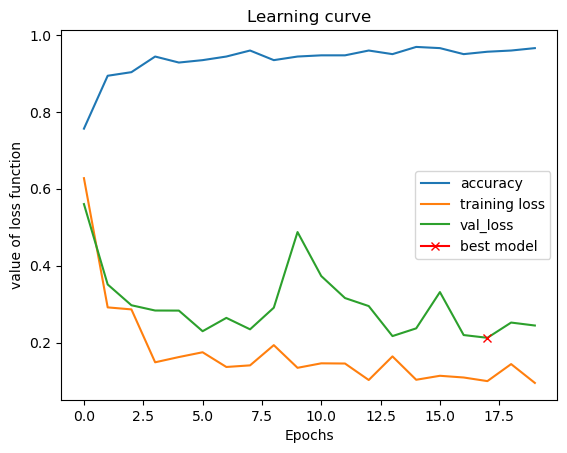

In [17]:
plt.title("Learning curve")
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["loss"], label="training loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.plot(np.argmin(history.history["val_loss"]), np.min(
    history.history["val_loss"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("value of loss function")
plt.legend()
plt.show()

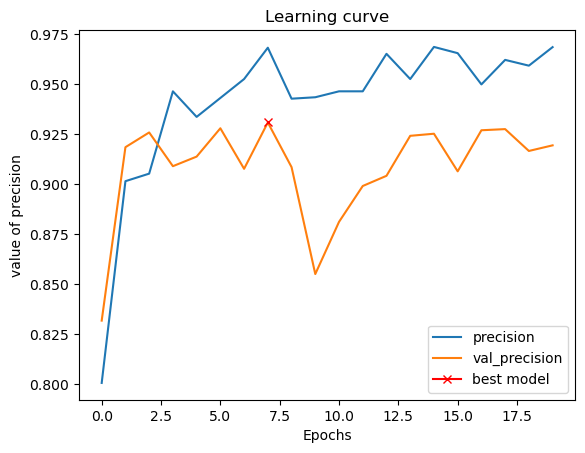

In [18]:
plt.title("Learning curve")
plt.plot(history.history["precision"], label="precision")
plt.plot(history.history["val_precision"], label="val_precision")
plt.plot( np.argmax(history.history["val_precision"]), np.max(history.history["val_precision"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("value of precision")
plt.legend()
plt.show()

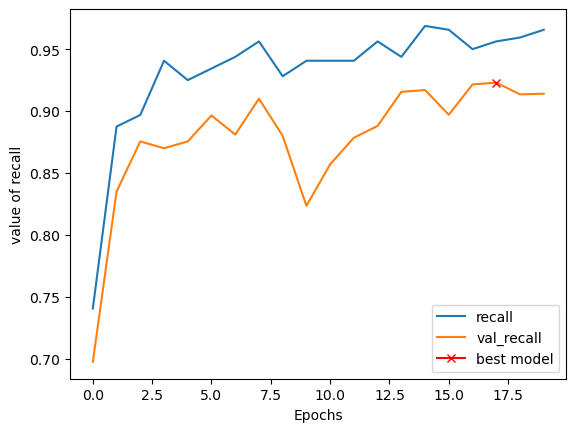

In [19]:
plt.plot(history.history["recall"], label="recall")
plt.plot(history.history["val_recall"], label="val_recall")
plt.plot( np.argmax(history.history["val_recall"]), np.max(history.history["val_recall"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("value of recall")
plt.legend()
plt.show()

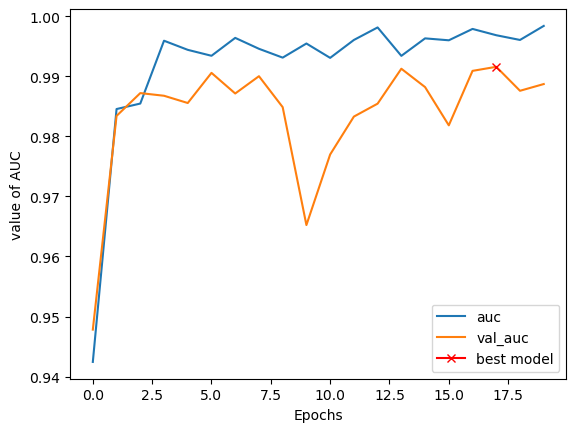

In [20]:
plt.plot(history.history["auc"], label="auc")
plt.plot(history.history["val_auc"], label="val_auc")
plt.plot( np.argmax(history.history["val_auc"]), np.max(history.history["val_auc"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("value of AUC")
plt.legend()
plt.show()

50/50 [==============================] - 16s 331ms/step


<Figure size 2000x2000 with 0 Axes>

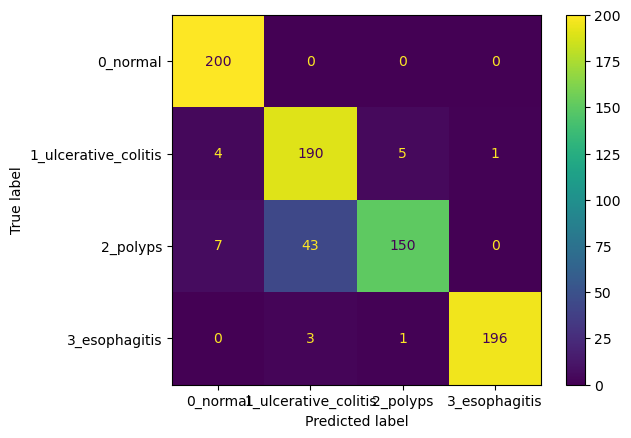

In [8]:
# ploting confusion matrix using sklearn
plt.figure(figsize=(20, 20))
cf_matrix = metrics.confusion_matrix(test_generator.classes, np.argmax(model.predict(test_generator), axis=1))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cf_matrix, display_labels=test_generator.class_indices.keys())
cm_display.plot()
plt.show()

# 6.MODEL PREDICTION

In [22]:
# testing the model
img = image.load_img(
    'data/test/1_ulcerative_colitis/test_ulcer_ (2).jpg', target_size=(224, 224))
imag = image.img_to_array(img)
imaga = np.expand_dims(imag, axis=0)
ypred = model.predict(imaga)
print(ypred)
a = np.argmax(ypred, -1)
if a == 0:
    op = "Normal"
elif a == 1:
    op = "Ulcerative colitis"
elif a == 2:
    op = "Polyp"
else:
    op = "Esophagitis"
print(op)


1/1 [==============================] - 3s 3s/step
[[2.8211196e-04 9.9400973e-01 8.1993086e-04 4.8882486e-03]]
Ulcerative colitis


In [6]:
model = tf.keras.models.load_model('EfficientNet.h5') # loading the model

In [7]:
# calculation of precision, recall, f1-score, support
print(metrics.classification_report(test_generator.classes, np.argmax(model.predict(test_generator), axis=1), target_names=test_generator.class_indices.keys()))

50/50 [==============================] - 71s 871ms/step
                      precision    recall  f1-score   support

            0_normal       0.94      1.00      0.97       200
1_ulcerative_colitis       0.85      0.96      0.90       200
            2_polyps       0.98      0.81      0.88       200
       3_esophagitis       0.99      0.98      0.99       200

            accuracy                           0.94       800
           macro avg       0.94      0.94      0.94       800
        weighted avg       0.94      0.94      0.94       800

